In [17]:
!pip install pandas



In [4]:
!pip3 install -U scikit-learn


Requirement already up-to-date: scikit-learn in /anaconda3/lib/python3.6/site-packages (0.20.0)


In [18]:
import numpy
import pandas as pd
import numpy as np
import sklearn
import keras
import collections
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
seed = 7
numpy.random.seed(seed)

In [25]:
print('preparing data...')
df_x_train = pd.read_csv('template_train.csv',header=None,  skiprows = 1,index_col = 0)
df_y_train = pd.read_csv('y_train.csv', header=0, index_col = 0)
X = df_x_train.values
y = df_y_train['y'].values
df_x_test = pd.read_csv('template_test.csv', header=None,skiprows = 1, index_col = 0)
X_test = df_x_test.values

preparing data...


In [33]:
count = collections.Counter(y)
max_class = 0
for c in range(0,4):
    if count[c] > max_class:
        max_class = count[c]

class_weight = np.zeros(4)
for c in range(0,4):
    if count[c] > 0:
        class_weight[c] = float(max_class) / float(count[c])
weights = np.zeros((len(y)), dtype='float')
for i in range(0,len(y)):
    weights[i] = class_weight[y[i]]

In [34]:
feature_size=len(X[0])
max_wav = np.amax(np.vstack((X[:, 0:feature_size], X_test[:, 0:feature_size])))
min_wav = np.amin(np.vstack((X[:, 0:feature_size], X_test[:, 0:feature_size])))
X[:, 0:feature_size] = ((X[:,0:feature_size] - min_wav) / (max_wav - min_wav))
X_test[:, 0:feature_size] = ((X_test[:,0:feature_size] - min_wav) / (max_wav - min_wav))

In [35]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [58]:
def baseline_model():

    model = Sequential()
    model.add(Dense(10, input_dim=180, activation='relu'))
    model.add(Dropout(rate= 0.1))
    model.add(Dense(30,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(50,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(100,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(50,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(30,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(10,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [59]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [60]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [61]:
 cross_val_score(estimator, X, y, scoring='f1_micro',cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

array([0.56640625, 0.59472656, 0.6001955 , 0.59139785, 0.60801564])

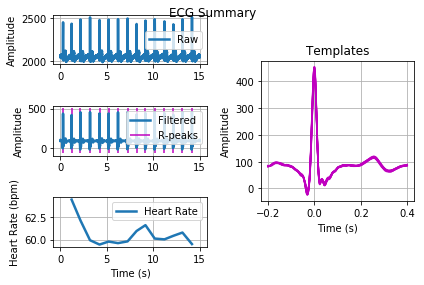

In [7]:
#clf = svm.SVC( random_state=0,class_weight='balanced',kernel='rbf',gamma=1 / (1000 * X.std()))

''''clf=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(5, 2),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
clf.fit(X, y) 
cross_val_score(clf, X, y, scoring='f1_micro', cv=5)  ''''

In [68]:
estimator.fit(X, y)
y_pred =estimator.predict(X_test)

In [69]:
f = open("submission.csv", "w")
f.write("id,y\n")
for i,x in enumerate(y_pred):
    f.write("{},{}\n".format(i,y_pred[i]))
f.close()


In [29]:
X.shape



(5117, 180)

In [30]:
X_test.shape

(3411, 180)

In [32]:
y.shape

(5117,)

In [52]:
dummy_y.shape

(5117, 4)